# Summary

This project analyzes Airbnb listings in Bergamo, Italy, focusing on various aspects such as pricing, occupancy rates, and amenities. The goal is to provide insights into the Airbnb market in Bergamo, helping hosts optimize their listings and potential guests make informed decisions.

## Key Objectives:
1. **Data Cleaning and Preparation**: Load and preprocess the dataset, including handling missing values and converting data types.
2. **Descriptive Analysis**: Provide an overview of the dataset, including summary statistics and data distribution.
3. **Price Analysis**: Examine the pricing of listings, identify outliers, and calculate average prices.
4. **Occupancy Analysis**: Calculate occupancy rates and analyze their distribution across different listings.
5. **Amenity Analysis**: Investigate the impact of various amenities on listing prices.
6. **Geospatial Analysis**: Create heatmaps and visualizations to understand the geographical distribution of prices and occupancy rates.
7. **Performance Metrics**: Analyze key performance metrics such as number of reviews and review scores.
8. **Interactive Visualization**: Develop an interactive Streamlit application to explore the data and visualize key insights.

## Key Findings:
- **Price Distribution**: The average price per night in Bergamo is calculated, and outliers are identified and removed to provide a more accurate analysis.
- **Occupancy Rates**: The average occupancy rate is determined, and listings with the highest occupancy rates are highlighted.
- **Impact of Amenities**: Certain amenities significantly impact the price of listings, with detailed analysis provided for top amenities.
- **Geospatial Insights**: Heatmaps reveal the distribution of high-value listings and areas with high occupancy rates.
- **Host Responsiveness**: Responsive hosts tend to have higher occupancy rates, emphasizing the importance of communication in the Airbnb market.

## Tools and Technologies:
- **Python**: For data analysis and visualization.
- **Pandas**: For data manipulation and analysis.
- **Seaborn and Matplotlib**: For creating visualizations.
- **Folium**: For geospatial analysis and creating interactive maps.
- **Streamlit**: For developing an interactive web application.
- **Plotly**: For creating interactive plots in the Streamlit app.

This project provides a comprehensive analysis of the Airbnb market in Bergamo, offering valuable insights for both hosts and guests. The interactive visualizations and detailed analysis help in understanding the key factors influencing the Airbnb market in this region.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get the path to the Downloads folder on macOS
downloads_path = os.path.expanduser("~/Downloads")

# Construct the full path to the CSV file
csv_path = os.path.join(downloads_path, 'Bergamo_Italy_AirBnB.csv')

# Print the full path (for debugging)
print(f"Attempting to read file from: {csv_path}")

# Load the dataset
df = pd.read_csv(csv_path)

# Check unique values in 'neighbourhood_cleansed'

# Assuming there's a 'city' column
df = df[df['neighbourhood_cleansed'].str.contains('Bergamo', case=False, na=False)]
print(df.head())


Attempting to read file from: /Users/msgfrom96/Downloads/Bergamo_Italy_AirBnB.csv
        id                          listing_url       scrape_id last_scraped  \
9    31412   https://www.airbnb.com/rooms/31412  20220627023437   2022-06-27   
12  215933  https://www.airbnb.com/rooms/215933  20220627023437   2022-06-27   
13  215946  https://www.airbnb.com/rooms/215946  20220627023437   2022-06-27   
15  288012  https://www.airbnb.com/rooms/288012  20220627023437   2022-06-27   
17  321684  https://www.airbnb.com/rooms/321684  20220627023437   2022-06-27   

                                                 name  \
9                               Cute and Cosy Terrace   
12               Donizetti Royal suite private toilet   
13  Double room shared bathroom in Donizetti guest...   
15                   Charming  Modern Flat in Bergamo   
17       SUPERIOR APARTMENT WITH WI-FI-BERGAMO CENTER   

                                          description  \
9   Grazioso ed accogliente appartame

In [41]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 790 entries, 9 to 2322
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            790 non-null    int64  
 1   listing_url                                   790 non-null    object 
 2   scrape_id                                     790 non-null    int64  
 3   last_scraped                                  790 non-null    object 
 4   name                                          790 non-null    object 
 5   description                                   774 non-null    object 
 6   neighborhood_overview                         471 non-null    object 
 7   picture_url                                   790 non-null    object 
 8   host_id                                       790 non-null    int64  
 9   host_url                                      790 non-null    object 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.900000e+02,7.900000e+02,7.900000e+02,790.000000,790.000000,0.0,790.000000,790.000000,790.000000,0.0,...,689.000000,689.000000,689.000000,689.000000,689.000000,790.000000,790.000000,790.000000,790.000000,692.000000
mean,7.777398e+16,2.022063e+13,1.433426e+08,3.574684,3.574684,NaN,45.696690,9.668868,3.559494,NaN,...,4.822061,4.877025,4.860218,4.777866,4.727750,3.348101,2.106329,1.059494,0.008861,1.590983
std,2.025087e+17,0.000000e+00,1.437841e+08,6.682847,6.682847,NaN,0.009470,0.013227,1.856276,NaN,...,0.339687,0.301316,0.349659,0.318602,0.349845,2.887250,2.324463,1.765822,0.093773,1.891297
min,3.141200e+04,2.022063e+13,1.349370e+05,0.000000,0.000000,NaN,45.668560,9.622260,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.771827e+07,2.022063e+13,2.042893e+07,1.000000,1.000000,NaN,45.691475,9.662375,2.000000,NaN,...,4.790000,4.880000,4.860000,4.710000,4.670000,1.000000,1.000000,0.000000,0.000000,0.327500
50%,3.208836e+07,2.022063e+13,8.964647e+07,2.000000,2.000000,NaN,45.695340,9.666990,3.000000,NaN,...,4.910000,4.950000,4.950000,4.870000,4.800000,2.000000,1.000000,0.000000,0.000000,0.980000
75%,4.946751e+07,2.022063e+13,2.349677e+08,4.000000,4.000000,NaN,45.703470,9.676450,4.000000,NaN,...,5.000000,5.000000,5.000000,4.990000,4.910000,4.000000,3.000000,2.000000,0.000000,2.140000
max,6.564256e+17,2.022063e+13,4.655957e+08,77.000000,77.000000,NaN,45.723698,9.708710,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,17.000000,12.000000,16.000000,1.000000,12.200000


In [42]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

neighbourhood_group_cleansed    790
bathrooms                       790
calendar_updated                790
host_neighbourhood              780
license                         620
                               ... 
minimum_maximum_nights            0
maximum_maximum_nights            0
minimum_nights_avg_ntm            0
maximum_nights_avg_ntm            0
id                                0
Length: 74, dtype: int64


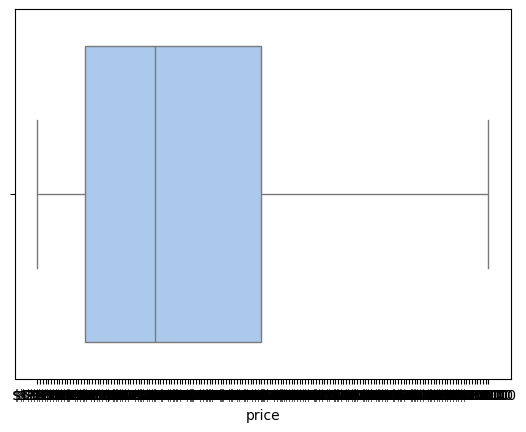

In [43]:
# Boxplot for price
sns.boxplot(x=df['price'])
plt.show()

In [44]:
# Convert 'price' column to numeric, removing '$' and ',' characters
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the average price
average_price = df['price'].mean()

print(f"The average price per night in Bergamo is €{average_price:.2f}")

The average price per night in Bergamo is €90.61


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/gz/zygkt4mn4sd0g24rh8vb0z940000gn/T/ipykernel_23988/3347831046.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [45]:
# Calculate Q1, Q3, and IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Print the number of rows removed
print(f"Number of outliers removed: {len(df) - len(df_no_outliers)}")

# Update the original dataframe
df = df_no_outliers.copy()

# Recalculate and print the new average price
new_average_price = df['price'].mean()
print(f"The new average price per night in Bergamo (after removing outliers) is €{new_average_price:.2f}")


Number of outliers removed: 47
The new average price per night in Bergamo (after removing outliers) is €78.98


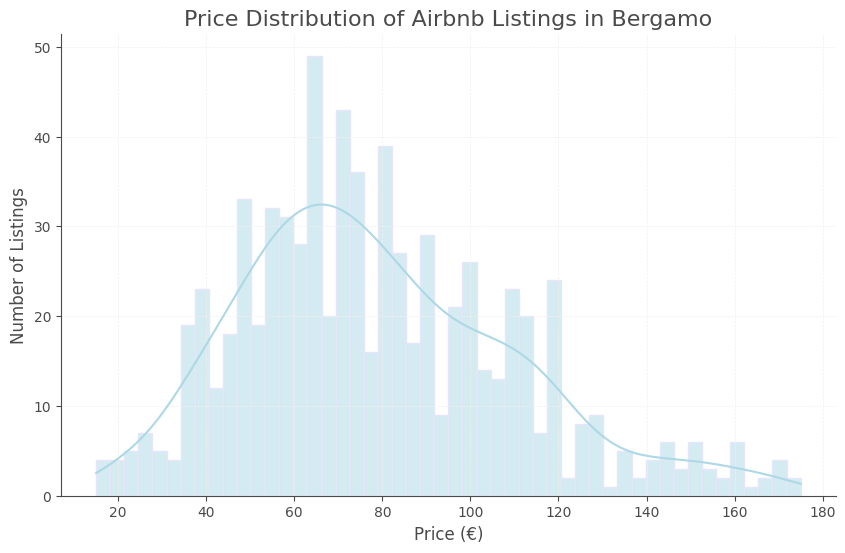

In [46]:
# Import required libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot with a pastel color palette
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")

# Create the histogram with KDE
sns.histplot(df['price'], bins=50, kde=True, color='lightblue', edgecolor='lavender')

# Customize the plot
plt.title('Price Distribution of Airbnb Listings in Bergamo', fontsize=16, color='#4a4a4a')
plt.xlabel('Price (€)', fontsize=12, color='#4a4a4a')
plt.ylabel('Number of Listings', fontsize=12, color='#4a4a4a')
plt.tick_params(colors='#4a4a4a')

# Add a grid with light color
plt.grid(color='#f0f0f0', linestyle='--', linewidth=0.5)

# Remove top and right spines, color left and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#4a4a4a')
plt.gca().spines['bottom'].set_color('#4a4a4a')

plt.show()

In [47]:
price_by_neighbourhood = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)
print(price_by_neighbourhood)

neighbourhood_cleansed
Bergamo    78.982503
Name: price, dtype: float64


In [48]:
price_by_property_type = df.groupby('property_type')['price'].mean().sort_values(ascending=False)
print(price_by_property_type)

property_type
Entire townhouse                      160.000000
Entire serviced apartment             126.000000
Room in serviced apartment            120.000000
Private room in loft                  113.000000
Private room in guesthouse            107.800000
Private room in vacation home         104.500000
Room in bed and breakfast             102.583333
Room in hotel                         100.400000
Private room in serviced apartment    100.000000
Entire bed and breakfast              100.000000
Entire villa                           94.000000
Entire loft                            93.909091
Entire condo                           91.136000
Entire home                            85.571429
Entire rental unit                     78.484568
Entire vacation home                   78.227273
Room in boutique hotel                 77.666667
Private room in bed and breakfast      74.800000
Tiny home                              71.000000
Private room in hostel                 71.000000
Privat

In [49]:
# Import required libraries
import folium
from folium.plugins import HeatMap
import os

# Create a base map centered on Bergamo
bergamo_map = folium.Map(location=[45.6983, 9.6773], zoom_start=13)

# Prepare data for the heatmap, focusing on price
heat_data = df[['latitude', 'longitude', 'price']].values.tolist()

# Add the heatmap layer with adjusted parameters for better visibility
HeatMap(heat_data, radius=10, blur=10, max_zoom=5, 
        gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 0.8: 'orange', 1: 'red'},
        min_opacity=0.5).add_to(bergamo_map)

# Add markers for the top 10 most expensive properties
top_10_expensive = df.nlargest(10, 'price')
for idx, row in top_10_expensive.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Price: €{row['price']:.2f}<br>Property Type: {row['property_type']}",
        icon=folium.Icon(color='darkred', icon='euro-sign')
    ).add_to(bergamo_map)

# Add a legend with updated styling
legend_html = '''
    <div style="
        position: fixed; 
        bottom: 50px; 
        left: 50px; 
        width: 220px; 
        z-index:9999; 
        font-size:14px; 
        padding: 10px;
        background-color: white;
        font-family: 'Montserrat', sans-serif;
        font-weight: bold;
        font-style: italic;
        color: black;
        border-radius: 5px;
        box-shadow: 0 0 15px rgba(0,0,0,0.2);
        ">
        <b>Legend</b><br>
        <i class="fa fa-map-marker fa-2x" style="color:darkred"></i> Top 10 Most Expensive<br>
        <b>Heatmap Colors:</b><br>
        <i class="fa fa-square" style="color:blue"></i> Low Price<br>
        <i class="fa fa-square" style="color:green"></i> Medium-Low Price<br>
        <i class="fa fa-square" style="color:yellow"></i> Medium Price<br>
        <i class="fa fa-square" style="color:orange"></i> Medium-High Price<br>
        <i class="fa fa-square" style="color:red"></i> High Price
    </div>
'''
bergamo_map.get_root().html.add_child(folium.Element(legend_html))

# Add Montserrat font
bergamo_map.get_root().header.add_child(folium.Element(
    '<link href="https://fonts.googleapis.com/css2?family=Montserrat:ital,wght@1,700&display=swap" rel="stylesheet">'
))

# Get the user's Downloads directory
#downloads_dir = os.path.expanduser("~/Downloads")

# Save the map to the Downloads directory
#map_file_path = os.path.join(downloads_dir, "bergamo_airbnb_map.html")
#bergamo_map.save(map_file_path)

# Display the map in the notebook
bergamo_map


In [50]:
amenities = df['amenities'].str.strip('{}').str.replace('"', '').str.get_dummies(sep=',')
top_amenities = amenities.sum().sort_values(ascending=False).head(10)
print(top_amenities)

Long term stays allowed    675
Hair dryer                 666
Wifi                       624
Hangers]                   605
Kitchen                    605
Heating                    594
Hot water                  544
Dishes and silverware      520
Shampoo                    499
Iron                       488
dtype: int64


Price Comparison for Top Amenities:
                Amenity  Price with Amenity  Price without Amenity  Price Difference
Long term stays allowed               80.60                  60.93             19.66
                   Wifi               80.01                  67.02             13.00
                     TV               80.65                  69.19             11.46
                Shampoo               81.78                  72.62              9.17
             Essentials               79.60                  72.24              7.35
                Kitchen               79.23                  77.90              1.33
             Hair dryer               79.04                  78.47              0.57


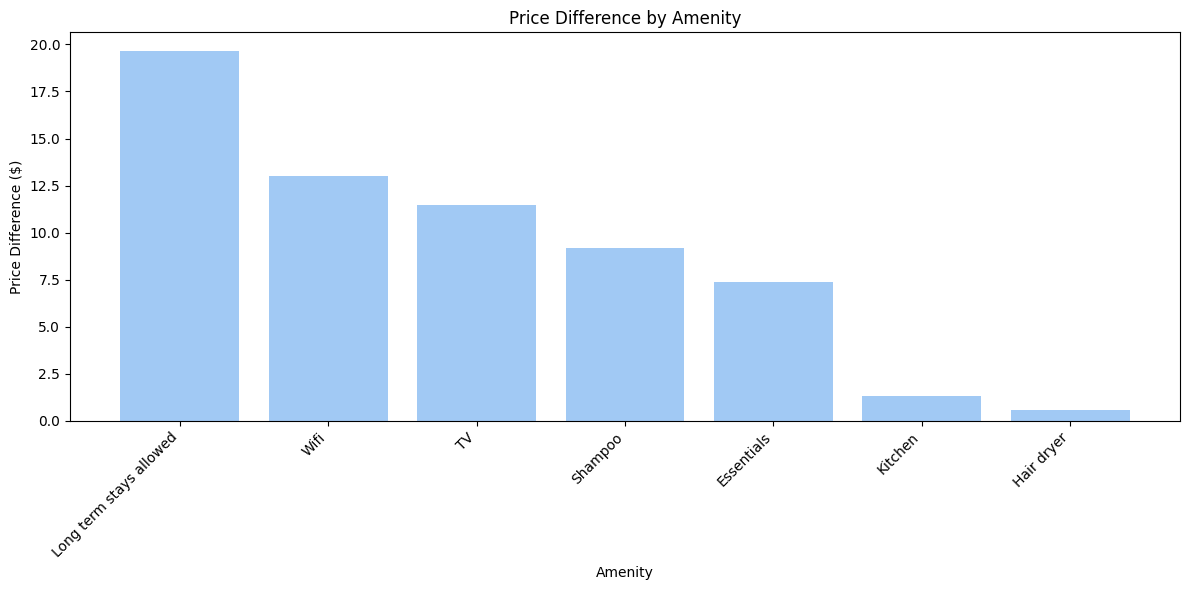

In [51]:
# Function to calculate price difference for an amenity
def price_difference_for_amenity(df, amenity):
    df[f'has_{amenity}'] = df['amenities'].str.contains(amenity, case=False)
    price_comparison = df.groupby(f'has_{amenity}')['price'].mean()
    difference = price_comparison[True] - price_comparison[False]
    return price_comparison, difference

# List of top amenities to analyze
top_amenities = ['Long term stays allowed', 'Wifi', 'Kitchen', 'Essentials', 'Hair dryer', 'TV', 'Shampoo']

# Create a list to store the results
results_list = []

# Analyze price differences for each amenity
for amenity in top_amenities:
    price_comparison, difference = price_difference_for_amenity(df, amenity)
    results_list.append({
        'Amenity': amenity,
        'Price with Amenity': price_comparison[True],
        'Price without Amenity': price_comparison[False],
        'Price Difference': difference
    })

# Create a DataFrame from the results list
results = pd.DataFrame(results_list)

# Sort the results by Price Difference in descending order
results = results.sort_values('Price Difference', ascending=False)

# Display the results table
print("Price Comparison for Top Amenities:")
print(results.to_string(index=False, float_format='{:.2f}'.format))

# Create a bar plot to visualize the price differences
plt.figure(figsize=(12, 6))
plt.bar(results['Amenity'], results['Price Difference'])
plt.title('Price Difference by Amenity')
plt.xlabel('Amenity')
plt.ylabel('Price Difference ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
df['occupancy_rate'] = 1 - (df['availability_365'] / 365)

In [53]:
average_occupancy = df['occupancy_rate'].mean()
print(f"The average occupancy rate is {average_occupancy:.2%}")

The average occupancy rate is 41.87%


In [54]:
top_occupancy = df.sort_values('occupancy_rate', ascending=False).head(10)
print(top_occupancy[['name', 'neighbourhood_cleansed', 'occupancy_rate']])

                                                name neighbourhood_cleansed  \
1042                           Maison Chérie B&B - 2                Bergamo   
2067                Stanza doppia o singola, Bergamo                Bergamo   
81          NEW BILOCALE HOSPITAL BERGAMO AND CENTER                Bergamo   
1043                           Maison Chérie B&B - 3                Bergamo   
1656                 La dimora del centro "Option C"                Bergamo   
748   Beautiful flat with garage in downtown Bergamo                Bergamo   
274                                       CAFFÈ NERO                Bergamo   
1360                            La dimora nel centro                Bergamo   
454        Cozy apartment with Free WiFi and parking                Bergamo   
710          Appartamento  ai piedi della funicolare                Bergamo   

      occupancy_rate  
1042             1.0  
2067             1.0  
81               1.0  
1043             1.0  
1656           

In [83]:
# Import required libraries
import folium
from folium.plugins import HeatMap
import os

# Create a base map centered on Bergamo
bergamo_map = folium.Map(location=[45.6983, 9.6773], zoom_start=13)

# Prepare data for the heatmap, focusing on occupancy rate
heat_data = df[['latitude', 'longitude', 'occupancy_rate']].values.tolist()

# Add the heatmap layer with adjusted parameters for better visibility
HeatMap(heat_data, radius=10, blur=10, max_zoom=5, 
        gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 0.8: 'orange', 1: 'red'},
        min_opacity=0.5).add_to(bergamo_map)

# Add markers for the top 10 properties with highest occupancy rates
top_10_occupancy = df.nlargest(10, 'occupancy_rate')
for idx, row in top_10_occupancy.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Occupancy Rate: {row['occupancy_rate']:.2%}<br>Property Type: {row['property_type']}",
        icon=folium.Icon(color='darkred', icon='home')
    ).add_to(bergamo_map)

# Add a legend with updated styling
legend_html = '''
    <div style="
        position: fixed; 
        bottom: 50px; 
        left: 50px; 
        width: 220px; 
        z-index:9999; 
        font-size:14px; 
        padding: 10px;
        background-color: white;
        font-family: 'Montserrat', sans-serif;
        font-weight: bold;
        font-style: italic;
        color: black;
        border-radius: 5px;
        box-shadow: 0 0 15px rgba(0,0,0,0.2);
        ">
        <b>Legend</b><br>
        <i class="fa fa-home fa-2x" style="color:darkred"></i> Top 10 Highest Occupancy<br>
        <b>Heatmap Colors:</b><br>
        <i class="fa fa-square" style="color:blue"></i> Low Occupancy<br>
        <i class="fa fa-square" style="color:green"></i> Medium-Low Occupancy<br>
        <i class="fa fa-square" style="color:yellow"></i> Medium Occupancy<br>
        <i class="fa fa-square" style="color:orange"></i> Medium-High Occupancy<br>
        <i class="fa fa-square" style="color:red"></i> High Occupancy
    </div>
'''
bergamo_map.get_root().html.add_child(folium.Element(legend_html))

# Add Montserrat font
bergamo_map.get_root().header.add_child(folium.Element(
    '<link href="https://fonts.googleapis.com/css2?family=Montserrat:ital,wght@1,700&display=swap" rel="stylesheet">'
))

# Get the user's Downloads directory
downloads_dir = os.path.expanduser("~/Downloads")

# Save the map to the Downloads directory
map_file_path = os.path.join(downloads_dir, "occupancy_heat_map.html")
bergamo_map.save(map_file_path)

# Display the map in the notebook
bergamo_map


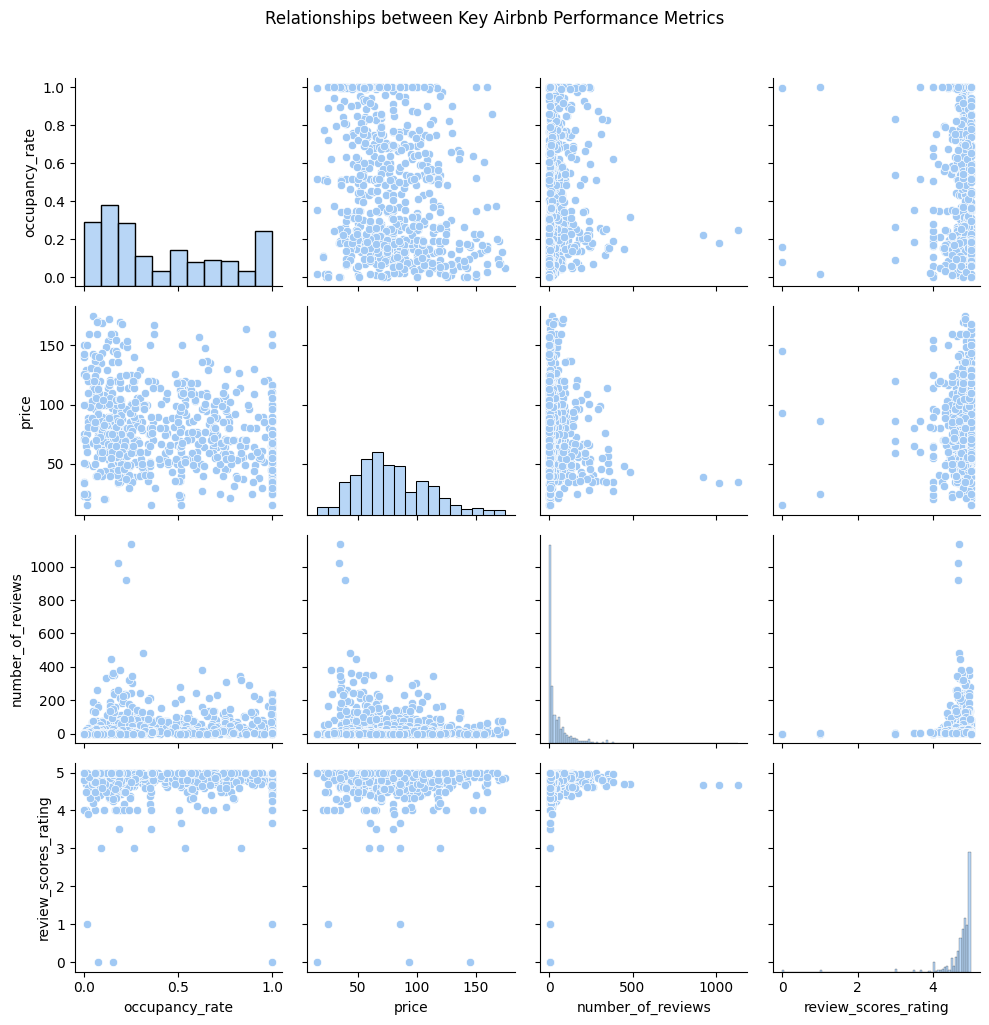

This pairplot shows the relationships between four key Airbnb performance metrics:
1. Occupancy Rate: The percentage of time the property is occupied.
2. Price: The nightly rate for the property.
3. Number of Reviews: How many reviews the property has received.
4. Review Scores Rating: The overall rating of the property.

Each scatterplot in the grid shows the relationship between two variables.
The diagonal shows the distribution of each variable individually.

Key observations:
- Look for any clear patterns or correlations in the scatterplots.
- Check if higher prices correlate with higher occupancy rates or better reviews.
- See if properties with more reviews tend to have higher ratings.
- Observe the distribution of each variable for any skewness or unusual patterns.

This visualization helps in understanding how these factors interact and influence each other in the Bergamo Airbnb market.


In [55]:
# Create a pairplot to visualize relationships between key performance variables
performance_vars = ['occupancy_rate', 'price', 'number_of_reviews', 'review_scores_rating']
sns.pairplot(df[performance_vars])
plt.suptitle("Relationships between Key Airbnb Performance Metrics", y=1.02)
plt.tight_layout()
plt.show()

# Interpret the pairplot
print("This pairplot shows the relationships between four key Airbnb performance metrics:")
print("1. Occupancy Rate: The percentage of time the property is occupied.")
print("2. Price: The nightly rate for the property.")
print("3. Number of Reviews: How many reviews the property has received.")
print("4. Review Scores Rating: The overall rating of the property.")
print("\nEach scatterplot in the grid shows the relationship between two variables.")
print("The diagonal shows the distribution of each variable individually.")
print("\nKey observations:")
print("- Look for any clear patterns or correlations in the scatterplots.")
print("- Check if higher prices correlate with higher occupancy rates or better reviews.")
print("- See if properties with more reviews tend to have higher ratings.")
print("- Observe the distribution of each variable for any skewness or unusual patterns.")
print("\nThis visualization helps in understanding how these factors interact and influence each other in the Bergamo Airbnb market.")


In [58]:
# Create a boolean column 'host_is_responsive' based on whether the host has a response rate
df['host_is_responsive'] = df['host_response_rate'].notnull()

# Define occupancy rate categories
def categorize_occupancy(rate):
    if rate < 0.3:
        return 'Low'
    elif rate < 0.6:
        return 'Medium'
    else:
        return 'High'

df['occupancy_category'] = df['occupancy_rate'].apply(categorize_occupancy)

# Group by host responsiveness and occupancy category
grouped_data = df.groupby(['host_is_responsive', 'occupancy_category'])

# Calculate the count and percentage for each group
result = grouped_data.size().unstack(fill_value=0)
result_percentage = result.div(result.sum(axis=1), axis=0) * 100

# Print the results
print("Count of listings by host responsiveness and occupancy category:")
print(result)
print("\nPercentage of listings by host responsiveness and occupancy category:")
print(result_percentage)

print("\nNote: host_is_responsive = True means the host has a response rate,")
print("      indicating they are actively communicating with guests.")
print("      host_is_responsive = False means the host has no response rate,")
print("      suggesting they might be less communicative or responsive.")

print("\nInterpretation:")
print("- This analysis shows the distribution of occupancy rates (Low, Medium, High)")
print("  for responsive and non-responsive hosts.")
print("- It helps understand if responsive hosts tend to have higher occupancy rates.")
print("- The percentages allow for easy comparison between responsive and non-responsive hosts.")
print("- This data can help understand the importance of communication in Airbnb success,")
print("  and how it relates to different levels of occupancy.")

Count of listings by host responsiveness and occupancy category:
occupancy_category  High  Low  Medium
host_is_responsive                   
False                 52   17      10
True                 172  353     139

Percentage of listings by host responsiveness and occupancy category:
occupancy_category       High        Low     Medium
host_is_responsive                                 
False               65.822785  21.518987  12.658228
True                25.903614  53.162651  20.933735

Note: host_is_responsive = True means the host has a response rate,
      indicating they are actively communicating with guests.
      host_is_responsive = False means the host has no response rate,
      suggesting they might be less communicative or responsive.

Interpretation:
- This analysis shows the distribution of occupancy rates (Low, Medium, High)
  for responsive and non-responsive hosts.
- It helps understand if responsive hosts tend to have higher occupancy rates.
- The percentages all

In [32]:
occupancy_by_superhost = df.groupby('host_is_superhost')['occupancy_rate'].mean()
print(occupancy_by_superhost)

host_is_superhost
f    0.424387
t    0.404987
Name: occupancy_rate, dtype: float64


In [86]:
# Get the path to the Downloads folder on macOS
downloads_path = os.path.expanduser("~/Downloads")

# Construct the full path to the CSV file
csv_path = os.path.join(downloads_path, 'Bergamo_Italy_AirBnB.csv')

# Print the full path (for debugging)
print(f"Attempting to read file from: {csv_path}")

# Load the dataset
df = pd.read_csv(csv_path)

# Calculate occupancy rate and clean price data
df['occupancy_rate'] = 1 - (df['availability_365'] / 365)
df['price'] = df['price'].replace(r'[$,]', '', regex=True).astype(float)

# Remove price outliers (keep 99% of the dataset)
lower_bound = df['price'].quantile(0.005)
upper_bound = df['price'].quantile(0.995)
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Create a new column for the heatmap value (combination of occupancy and price)
df['heatmap_value'] = df['occupancy_rate'] * df['price']

# Create a map centered on Bergamo
m = folium.Map(location=[45.6983, 9.6770], zoom_start=12)

# Create a HeatMap layer
HeatMap(
    data=df[['latitude', 'longitude', 'heatmap_value']].values.tolist(),
    radius=15,
    max_zoom=1,
).add_to(m)

# Define thresholds for high occupancy and high price (e.g., top 10%)
high_occupancy_threshold = df['occupancy_rate'].quantile(0.9)
high_price_threshold = df['price'].quantile(0.9)

# Filter for high occupancy and high price listings
high_value_listings = df[(df['occupancy_rate'] >= high_occupancy_threshold) & 
                         (df['price'] >= high_price_threshold)]

# Add markers for high value listings
for idx, row in high_value_listings.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Neighborhood: {row['neighbourhood_cleansed']}<br>Price: ${row['price']:.2f}<br>Occupancy: {row['occupancy_rate']:.2%}",
        icon=folium.Icon(color='red', icon='star')
    ).add_to(m)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:16px"><b>Bergamo Airbnb Price and Occupancy Heatmap</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Save the map to the Downloads folder
map_file_path = os.path.join(downloads_path, 'bergamo_airbnb_heatmap.html')
m.save(map_file_path)
print(f"Heatmap saved to: {map_file_path}")

# Display the map
display(m)

# Calculate new heatmap value based on occupancy * price * 365
df['new_heatmap_value'] = df['occupancy_rate'] * df['price'] * 365

# Get top 10 neighborhoods by new heatmap value
top_10_neighborhoods = df.groupby('neighbourhood_cleansed')['new_heatmap_value'].mean().nlargest(10)

print("\nTop 10 Neighborhoods by Average Annual Revenue Potential:")
for neighborhood, value in top_10_neighborhoods.items():
    print(f"- {neighborhood}: ${value:,.2f}")

# Search for Bergamo in the neighborhood names
bergamo_neighborhoods = df[df['neighbourhood_cleansed'].str.contains('Bergamo', case=False, na=False)]

if not bergamo_neighborhoods.empty:
    print("\nNeighborhoods containing 'Bergamo':")
    for neighborhood in bergamo_neighborhoods['neighbourhood_cleansed'].unique():
        avg_value = bergamo_neighborhoods[bergamo_neighborhoods['neighbourhood_cleansed'] == neighborhood]['new_heatmap_value'].mean()
        print(f"- {neighborhood}: ${avg_value:,.2f}")
else:
    print("\nNo neighborhoods containing 'Bergamo' found in the dataset.")

print("\nNote: If 'Bergamo' is not found in the neighborhood names, it might be because:")
print("1. The dataset might be using more specific neighborhood names within Bergamo.")
print("2. 'Bergamo' might be considered the overall area, with listings categorized into smaller districts.")
print("3. There might be a different naming convention used in the dataset for Bergamo's areas.")

print("\nTo further investigate, you may want to:")
print("1. Check the unique values in the 'neighbourhood_cleansed' column.")
print("2. Look for Italian neighborhood names that might correspond to Bergamo's districts.")
print("3. Consult the data source documentation for information on how neighborhoods are categorized.")

# Display unique neighborhood names
print("\nUnique neighborhood names in the dataset:")
print(df['neighbourhood_cleansed'].unique())

print("\nNote: After removing price outliers, we kept 99% of the dataset.")
print(f"Price range: ${lower_bound:.2f} to ${upper_bound:.2f}")

Attempting to read file from: /Users/msgfrom96/Downloads/Bergamo_Italy_AirBnB.csv
Heatmap saved to: /Users/msgfrom96/Downloads/bergamo_airbnb_heatmap.html



Top 10 Neighborhoods by Average Annual Revenue Potential:
- Lurano: $78,480.00
- Gandino: $73,000.00
- Mezzoldo: $36,982.50
- Torre Pallavicina: $30,172.17
- Luzzana: $29,700.00
- Riva di Solto: $28,501.90
- Caprino Bergamasco: $26,810.00
- Tavernola Bergamasca: $26,555.64
- Almenno San Salvatore: $25,172.30
- Bottanuco: $24,361.00

Neighborhoods containing 'Bergamo':
- Bergamo: $12,896.94

Note: If 'Bergamo' is not found in the neighborhood names, it might be because:
1. The dataset might be using more specific neighborhood names within Bergamo.
2. 'Bergamo' might be considered the overall area, with listings categorized into smaller districts.
3. There might be a different naming convention used in the dataset for Bergamo's areas.

To further investigate, you may want to:
1. Check the unique values in the 'neighbourhood_cleansed' column.
2. Look for Italian neighborhood names that might correspond to Bergamo's districts.
3. Consult the data source documentation for information on ho

In [62]:
import streamlit as st
import pandas as pd
import plotly.express as px
import os

# Load the dataset
@st.cache_data
def load_data():
    file_path = 'Bergamo_Italy_AirBnB.csv'
    if not os.path.exists(file_path):
        st.error(f"Error: The file '{file_path}' does not exist. Please make sure the CSV file is in the correct location.")
        return None
    
    try:
        df = pd.read_csv(file_path)
        df['price'] = df['price'].replace(r'[$,]', '', regex=True).astype(float)
        df['occupancy_rate'] = 1 - (df['availability_365'] / 365)
        required_columns = ['latitude', 'longitude', 'price', 'occupancy_rate', 'room_type', 'accommodates']
        df_filtered = df[required_columns].dropna()
        return df_filtered
    except Exception as e:
        st.error(f"An error occurred while loading the data: {str(e)}")
        return None

df_filtered = load_data()

if df_filtered is not None:
    # Apply Filters
    filtered_df = df_filtered[
        (df_filtered['price'] >= price_range[0]) &
        (df_filtered['price'] <= price_range[1]) &
        (df_filtered['occupancy_rate'] >= occupancy_range[0] / 100) &
        (df_filtered['occupancy_rate'] <= occupancy_range[1] / 100) &
        (df_filtered['room_type'].isin(selected_room_types)) &
        (df_filtered['accommodates'] >= accommodates_range[0]) &
        (df_filtered['accommodates'] <= accommodates_range[1])
    ]

    st.markdown(f"### Total Listings: {filtered_df.shape[0]}")

    # Create the heatmap
    fig = px.density_mapbox(
        filtered_df, 
        lat='latitude', 
        lon='longitude', 
        z='occupancy_rate', 
        radius=10,
        center=dict(lat=45.6983, lon=9.6770),  # Center on Bergamo
        zoom=10,
        mapbox_style="stamen-terrain",
        color_continuous_scale="YlOrRd",
        title="Occupancy Rate Heatmap"
    )

    fig.update_layout(margin=dict(l=0, r=0, t=50, b=0))

    st.plotly_chart(fig, use_container_width=True)

    # Optional: Show filtered data
    with st.expander("View Filtered Data"):
        st.dataframe(filtered_df)
else:
    st.warning("Unable to proceed. Please check the data file and try again.")

2024-09-25 16:52:58.349 No runtime found, using MemoryCacheStorageManager
2024-09-25 16:52:58.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 16:52:58.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 16:52:58.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 16:52:58.351 No runtime found, using MemoryCacheStorageManager
2024-09-25 16:52:58.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 16:52:58.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 16:52:58.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-25 16:52:58.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

In [63]:
streamlit run airbnb_heatmap.py

SyntaxError: invalid syntax (1896201721.py, line 1)